<a href="https://colab.research.google.com/github/RM-RAMASAMY/CMPE-255/blob/main/Assignment_3_Pycaret/Time_Series_Forecasting_With_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install opendatasets &>/dev/null
!pip install pycaret[full] &>/dev/null

import opendatasets as od
import pandas

In [6]:
od.download("https://www.kaggle.com/datasets/census/population-time-series-data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rmramasamy
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/census/population-time-series-data


100%|██████████| 8.04k/8.04k [00:00<00:00, 2.64MB/s]

In [7]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

In [107]:
### load sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data1 = pandas.read_csv('/content/population-time-series-data/POP.csv')
data1.drop('realtime_start', axis=1, inplace=True)
data1.drop('realtime_end', axis=1, inplace=True)
data1 = data1.reindex(columns=["date","value"])
data1

# discontinued as there was a problem with the col data type

,date,value
0,1952-01-01,156309.000
1,1952-02-01,156527.000
2,1952-03-01,156731.000
3,1952-04-01,156943.000
4,1952-05-01,157140.000
...,...,...
811,2019-08-01,329591.333
812,2019-09-01,329785.872
813,2019-10-01,329982.035
814,2019-11-01,330154.949


In [38]:
### loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = get_data('airline')

,Number of airline passengers
Period,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


<Axes: xlabel='Period'>

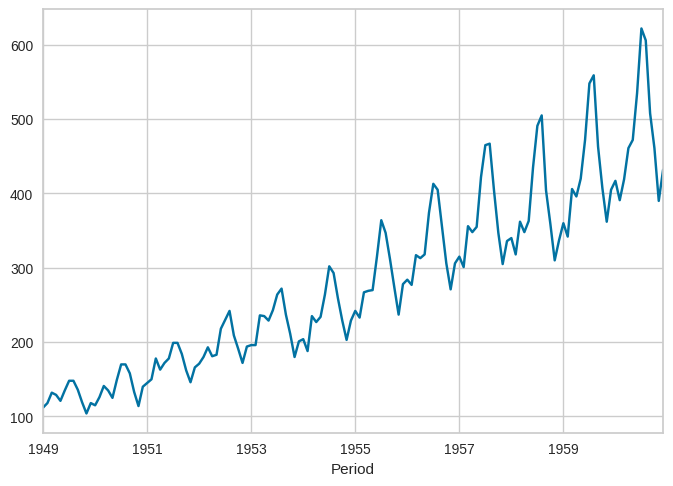

In [39]:
# plot the dataset
data.plot()

In [40]:
# import pycaret time series and init setup
from pycaret.time_series import *
s = setup(data, fh = 3 ,session_id = 123)

,Description,Value
0,session_id,123
1,Target,Number of airline passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(141, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [41]:
# import TSForecastingExperiment and init the class
from pycaret.time_series import TSForecastingExperiment
exp = TSForecastingExperiment()

In [42]:
# check the type of exp
type(exp)

pycaret.time_series.forecasting.oop.TSForecastingExperiment

In [43]:
# init setup on exp
exp.setup(data, fh = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Number of airline passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(141, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [44]:
# check statistical tests on original data
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,144.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,280.298611
3,Summary,Statistics,Transformed,Median,,265.5
4,Summary,Statistics,Transformed,Standard Deviation,,119.966317
5,Summary,Statistics,Transformed,Variance,,14391.917201
6,Summary,Statistics,Transformed,Kurtosis,,-0.364942
7,Summary,Statistics,Transformed,Skewness,,0.58316
8,Summary,Statistics,Transformed,# Distinct Values,,118.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",1606.083817


In [45]:
# compare baseline models
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
stlf,STLF,0.4136,0.4530,12.7373,15.8272,0.0262,0.0261,0.2016,0.0867
ets,ETS,0.4912,0.5541,15.0940,19.3099,0.0318,0.0316,-0.4465,0.1767
exp_smooth,Exponential Smoothing,0.4929,0.5560,15.1460,19.3779,0.0320,0.0317,-0.4600,2.6700
arima,ARIMA,0.6964,0.7110,21.3757,24.7774,0.0447,0.0456,-0.5495,0.1967
auto_arima,Auto ARIMA,0.7136,0.6945,21.9390,24.2138,0.0459,0.0464,-0.5454,29.1033
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.8658,0.8362,26.7826,29.3947,0.0516,0.0536,0.1501,0.3333
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.8904,0.8722,27.5266,30.6243,0.0534,0.0555,-0.0092,0.4700
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.8905,0.8722,27.5270,30.6246,0.0534,0.0555,-0.0092,0.2067
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.8944,0.8746,27.6535,30.7127,0.0535,0.0557,-0.0063,0.2033
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.8966,0.8759,27.7231,30.7594,0.0536,0.0558,-0.0040,0.2067


Processing:   0%|          | 0/121 [00:00<?, ?it/s]

In [46]:
# compare models using OOP
exp.compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
stlf,STLF,0.4136,0.4530,12.7373,15.8272,0.0262,0.0261,0.2016,0.0800
ets,ETS,0.4912,0.5541,15.0940,19.3099,0.0318,0.0316,-0.4465,0.1767
exp_smooth,Exponential Smoothing,0.4929,0.5560,15.1460,19.3779,0.0320,0.0317,-0.4600,1.1900
arima,ARIMA,0.6964,0.7110,21.3757,24.7774,0.0447,0.0456,-0.5495,0.1633
auto_arima,Auto ARIMA,0.7136,0.6945,21.9390,24.2138,0.0459,0.0464,-0.5454,30.0933
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.8658,0.8362,26.7826,29.3947,0.0516,0.0536,0.1501,0.3767
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.8904,0.8722,27.5266,30.6243,0.0534,0.0555,-0.0092,0.4200
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.8905,0.8722,27.5270,30.6246,0.0534,0.0555,-0.0092,0.2000
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.8944,0.8746,27.6535,30.7127,0.0535,0.0557,-0.0063,0.2000
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.8966,0.8759,27.7231,30.7594,0.0536,0.0558,-0.0040,0.2067


Processing:   0%|          | 0/121 [00:00<?, ?it/s]

STLForecaster(sp=12)

In [47]:
# plot forecast
plot_model(best, plot = 'forecast')

In [48]:
# plot forecast for 36 months in future
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 36})

In [49]:
# residuals plot
plot_model(best, plot = 'residuals')

In [50]:
# check docstring to see available plots
# help(plot_model)

In [51]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,STLF,0.3305,0.3157,10.5518,11.4475,0.0255,0.0252,0.8457


In [52]:
# show predictions df
holdout_pred.head()

,y_pred
1960-10,455.2909
1960-11,406.4324
1960-12,441.5140


In [53]:
# generate forecast for 36 period in future
predict_model(best, fh = 36)

,y_pred
1960-10,455.2909
1960-11,406.4324
1960-12,441.5140
1961-01,456.2386
1961-02,430.1439
1961-03,471.7323
1961-04,490.5395
1961-05,507.2320
1961-06,567.3178
1961-07,650.9920


In [54]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 STLForecaster(sp=12))]))]),
 'my_first_pipeline.pkl')

In [55]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                STLForecaster(sp=12))]))])

In [56]:
s = setup(data, fh = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Number of airline passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(141, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [57]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'all_sps_to_use',
 'approach_type',
 'candidate_sps',
 'data',
 'dataset',
 'dataset_transformed',
 'enforce_exogenous',
 'enforce_pi',
 'exogenous_present',
 'exp_id',
 'exp_name_log',
 'fh',
 'fold_generator',
 'fold_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'index_type',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'model_engines',
 'n_jobs_param',
 'pipeline',
 'primary_sp_to_use',
 'seasonality_present',
 'seed',
 'significant_sps',
 'significant_sps_no_harmonics',
 'strictly_positive',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [58]:
# lets access y_train_transformed
get_config('y_train_transformed')

,Number of airline passengers
Period,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0
...,...
1960-05,472.0
1960-06,535.0
1960-07,622.0


In [59]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


In [60]:
# help(setup)

In [61]:
# init setup fold_strategy = expanding
s = setup(data, fh = 3, session_id = 123,
          fold_strategy = 'expanding', numeric_imputation_target = 'drift')

,Description,Value
0,session_id,123
1,Target,Number of airline passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(141, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [62]:
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
stlf,STLF,0.4136,0.4530,12.7373,15.8272,0.0262,0.0261,0.2016,0.1167
ets,ETS,0.4912,0.5541,15.0940,19.3099,0.0318,0.0316,-0.4465,0.2167
exp_smooth,Exponential Smoothing,0.4929,0.5560,15.1460,19.3779,0.0320,0.0317,-0.4600,0.1967
arima,ARIMA,0.6964,0.7110,21.3757,24.7774,0.0447,0.0456,-0.5495,0.2100
auto_arima,Auto ARIMA,0.7136,0.6945,21.9390,24.2138,0.0459,0.0464,-0.5454,31.8367
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.8658,0.8362,26.7826,29.3947,0.0516,0.0536,0.1501,0.4667
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.8904,0.8722,27.5266,30.6243,0.0534,0.0555,-0.0092,0.3567
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.8905,0.8722,27.5270,30.6246,0.0534,0.0555,-0.0092,0.2433
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.8944,0.8746,27.6535,30.7127,0.0535,0.0557,-0.0063,0.2500
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.8966,0.8759,27.7231,30.7594,0.0536,0.0558,-0.0040,0.2433


Processing:   0%|          | 0/121 [00:00<?, ?it/s]

In [63]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend._polynomial_trend_for...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True


In [64]:
compare_ts_models = compare_models(include = ['ets', 'arima', 'theta', 'naive', 'snaive', 'grand_means', 'polytrend'])

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
ets,ETS,0.4912,0.5541,15.0940,19.3099,0.0318,0.0316,-0.4465,0.2367
arima,ARIMA,0.6964,0.7110,21.3757,24.7774,0.0447,0.0456,-0.5495,0.2000
theta,Theta Forecaster,1.0839,1.0393,33.3223,36.2555,0.0686,0.0710,-1.7926,0.0967
naive,Naive Forecaster,1.5654,1.4951,48.4444,52.5232,0.0920,0.0981,-1.8344,0.1000
snaive,Seasonal Naive Forecaster,1.6741,1.5343,51.6667,53.7350,0.1052,0.1117,-4.5388,0.1867
polytrend,Polynomial Trend Forecaster,2.1553,2.1096,66.9817,74.4048,0.1241,0.1350,-4.2525,0.1200
grand_means,Grand Means Forecaster,7.3065,6.5029,226.0502,228.3880,0.4469,0.5821,-72.1183,0.1500


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

In [65]:
compare_ts_models

AutoETS(seasonal='mul', sp=12, trend='add')

In [66]:
compare_ts_models_results = pull()
compare_ts_models_results

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
ets,ETS,0.4912,0.5541,15.094,19.3099,0.0318,0.0316,-0.4465,0.2367
arima,ARIMA,0.6964,0.711,21.3757,24.7774,0.0447,0.0456,-0.5495,0.2000
theta,Theta Forecaster,1.0839,1.0393,33.3223,36.2555,0.0686,0.071,-1.7926,0.0967
naive,Naive Forecaster,1.5654,1.4951,48.4444,52.5232,0.092,0.0981,-1.8344,0.1000
snaive,Seasonal Naive Forecaster,1.6741,1.5343,51.6667,53.735,0.1052,0.1117,-4.5388,0.1867
polytrend,Polynomial Trend Forecaster,2.1553,2.1096,66.9817,74.4048,0.1241,0.135,-4.2525,0.1200
grand_means,Grand Means Forecaster,7.3065,6.5029,226.0502,228.388,0.4469,0.5821,-72.1183,0.1500


In [67]:
best_mae_models_top3 = compare_models(sort = 'R2', n_select = 3)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
stlf,STLF,0.4136,0.4530,12.7373,15.8272,0.0262,0.0261,0.2016,0.1200
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.8658,0.8362,26.7826,29.3947,0.0516,0.0536,0.1501,0.2600
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.8966,0.8759,27.7231,30.7594,0.0536,0.0558,-0.0040,0.3900
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.8966,0.8758,27.7224,30.7580,0.0536,0.0558,-0.0042,0.3967
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.8944,0.8746,27.6535,30.7127,0.0535,0.0557,-0.0063,0.2400
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.8904,0.8722,27.5266,30.6243,0.0534,0.0555,-0.0092,0.2733
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.8905,0.8722,27.5270,30.6246,0.0534,0.0555,-0.0092,0.2867
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.9156,0.8878,28.3188,31.1821,0.0547,0.0569,-0.0209,0.4000
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,1.0695,0.9924,33.1500,34.9277,0.0631,0.0656,-0.1682,0.2767
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,1.1702,1.0887,36.2401,38.2815,0.0695,0.0727,-0.4366,0.4167


Processing:   0%|          | 0/123 [00:00<?, ?it/s]

In [68]:
# list of top 3 models by MAE
best_mae_models_top3

[STLForecaster(sp=12),
 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [12, 11,
                                                                         10, 9,
                                                                         8, 7, 6,
                                                                         5, 4, 3,
                                                                         2, 1]},
                                                    n_jobs=1)],
                     regressor=HuberRegressor(), sp=12, window_length=12),
 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [12, 11,
                                                                         10, 9,
                                                                         8, 7, 6,
                                                                         5, 4, 3,
                                                                         2, 1]},
                          

In [69]:
# help(compare_models)

In [70]:
# check stats on original data
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,144.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,280.298611
3,Summary,Statistics,Transformed,Median,,265.5
4,Summary,Statistics,Transformed,Standard Deviation,,119.966317
5,Summary,Statistics,Transformed,Variance,,14391.917201
6,Summary,Statistics,Transformed,Kurtosis,,-0.364942
7,Summary,Statistics,Transformed,Skewness,,0.58316
8,Summary,Statistics,Transformed,# Distinct Values,,118.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",1606.083817


In [71]:
# check_stats on residuals of best model
check_stats(estimator = best)

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Residual,Length,,130.0
1,Summary,Statistics,Residual,# Missing Values,,0.0
2,Summary,Statistics,Residual,Mean,,1.758098
3,Summary,Statistics,Residual,Median,,0.9863
4,Summary,Statistics,Residual,Standard Deviation,,8.483277
5,Summary,Statistics,Residual,Variance,,71.965994
6,Summary,Statistics,Residual,Kurtosis,,0.674611
7,Summary,Statistics,Residual,Skewness,,0.205517
8,Summary,Statistics,Residual,# Distinct Values,,130.0
9,White Noise,Ljung-Box,Residual,Test Statictic,"{'alpha': 0.05, 'K': 24}",191.067665


In [72]:
# from pycaret.time_series import *
# s = setup(data, fh = 3, session_id = 123, log_experiment='mlflow', experiment_name='airline_experiment')

In [73]:
# compare models
# best = compare_models()

In [74]:
# start mlflow server on localhost:5000
# !mlflow ui

In [75]:
# help(setup)

In [76]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend._polynomial_trend_for...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True


In [77]:
# train ets with default fold=3
ets = create_model('ets')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1959-12,0.5083,0.7238,15.4772,25.0045,0.0371,0.0354,-2.8436
1,1960-03,0.6856,0.6262,21.0315,21.7984,0.0437,0.0448,0.5529
2,1960-06,0.2796,0.3123,8.7733,11.1270,0.0147,0.0146,0.9512
Mean,NaT,0.4912,0.5541,15.0940,19.3099,0.0318,0.0316,-0.4465
SD,NaT,0.1662,0.1755,5.0117,5.9324,0.0124,0.0126,1.7028


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [78]:
ets_results = pull()
print(type(ets_results))
ets_results

<class 'pandas.core.frame.DataFrame'>


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1959-12,0.5083,0.7238,15.4772,25.0045,0.0371,0.0354,-2.8436
1,1960-03,0.6856,0.6262,21.0315,21.7984,0.0437,0.0448,0.5529
2,1960-06,0.2796,0.3123,8.7733,11.1270,0.0147,0.0146,0.9512
Mean,NaT,0.4912,0.5541,15.0940,19.3099,0.0318,0.0316,-0.4465
SD,NaT,0.1662,0.1755,5.0117,5.9324,0.0124,0.0126,1.7028


In [79]:
# train theta model with fold=5
theta = create_model('theta', fold=5)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1959-06,0.8152,0.8212,23.7114,27.0777,0.0436,0.0448,0.6016
1,1959-09,0.1622,0.1723,4.8339,5.8216,0.0127,0.0128,0.9213
2,1959-12,0.6788,0.7857,20.6700,27.1432,0.0501,0.0481,-3.5292
3,1960-03,2.0377,1.8037,62.5075,62.7874,0.1276,0.1363,-2.7090
4,1960-06,0.5352,0.5287,16.7895,18.8359,0.0282,0.0286,0.8603
Mean,NaT,0.8458,0.8223,25.7024,28.3332,0.0524,0.0541,-0.7710
SD,NaT,0.6346,0.5428,19.4876,18.9053,0.0397,0.0430,1.9377


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [80]:
# train theta with specific model parameters
create_model('theta', deseasonalize = False, fold=5)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1959-06,1.9597,1.9658,57.0033,64.8214,0.1046,0.1117,-1.2833
1,1959-09,2.5537,2.3345,76.0868,78.8857,0.1979,0.1785,-13.4421
2,1959-12,0.3980,0.3686,12.1206,12.7351,0.0300,0.0298,0.0030
3,1960-03,2.1688,2.1163,66.5262,73.6688,0.1324,0.1436,-4.1060
4,1960-06,1.9552,1.8291,61.3391,65.1682,0.1034,0.1083,-0.6723
Mean,NaT,1.8071,1.7229,54.6152,59.0559,0.1136,0.1144,-3.9002
SD,NaT,0.7374,0.6976,22.1793,23.7612,0.0541,0.0493,4.9718


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

ThetaForecaster(deseasonalize=False, sp=12)

In [81]:
# help(create_model)

In [82]:
# train a dt model with default params
dt = create_model('dt_cds_dt')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1959-12,0.5039,0.5459,15.3434,18.8593,0.0377,0.0388,-1.1865
1,1960-03,1.5566,1.3747,47.7489,47.8526,0.0984,0.1036,-1.1544
2,1960-06,1.5185,1.4832,47.6395,52.8433,0.0838,0.0884,-0.0996
Mean,NaT,1.1930,1.1346,36.9106,39.8518,0.0733,0.0769,-0.8135
SD,NaT,0.4875,0.4186,15.2504,14.9831,0.0259,0.0277,0.5050


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [83]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1959-12,0.6369,0.7822,19.3938,27.0225,0.0470,0.0450,-3.4890
1,1960-03,1.3005,1.1639,39.8938,40.5155,0.0819,0.0856,-0.5444
2,1960-06,0.9561,0.9788,29.9971,34.8742,0.0495,0.0512,0.5211
Mean,NaT,0.9645,0.9750,29.7616,34.1374,0.0595,0.0606,-1.1708
SD,NaT,0.2710,0.1559,8.3707,5.5331,0.0159,0.0178,1.6960


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.9s finished


In [84]:
dt

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [12, 11,
                                                                        10, 9,
                                                                        8, 7, 6,
                                                                        5, 4, 3,
                                                                        2, 1]},
                                                   n_jobs=1)],
                    regressor=DecisionTreeRegressor(random_state=123), sp=12,
                    window_length=12)

In [85]:
# define tuning grid
dt_grid = {'regressor__max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = MAE
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'MAE')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1959-12,0.5466,0.5815,16.6450,20.0910,0.0409,0.0421,-1.4814
1,1960-03,1.2777,1.1388,39.1945,39.6419,0.0799,0.0833,-0.4785
2,1960-06,1.6742,1.5262,52.5234,54.3772,0.0906,0.0952,-0.1643
Mean,NaT,1.1662,1.0822,36.1210,38.0367,0.0705,0.0735,-0.7081
SD,NaT,0.4670,0.3877,14.8077,14.0432,0.0214,0.0227,0.5617


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    4.8s finished


In [86]:
# see tuned_dt params
tuned_dt

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [12, 11,
                                                                        10, 9,
                                                                        8, 7, 6,
                                                                        5, 4, 3,
                                                                        2, 1]},
                                                   n_jobs=1)],
                    regressor=DecisionTreeRegressor(max_depth=4, random_state=123),
                    sp=12, window_length=12)

In [87]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1959-12,0.6369,0.7822,19.3938,27.0225,0.0470,0.0450,-3.4890
1,1960-03,1.3005,1.1639,39.8938,40.5155,0.0819,0.0856,-0.5444
2,1960-06,0.9561,0.9788,29.9971,34.8742,0.0495,0.0512,0.5211
Mean,NaT,0.9645,0.9750,29.7616,34.1374,0.0595,0.0606,-1.1708
SD,NaT,0.2710,0.1559,8.3707,5.5331,0.0159,0.0178,1.6960


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.7s finished


In [88]:
# model object
tuned_dt

BaseCdsDtForecaster(degree=3, deseasonal_model='multiplicative',
                    fe_target_rr=[WindowSummarizer(lag_feature={'lag': [12, 11,
                                                                        10, 9,
                                                                        8, 7, 6,
                                                                        5, 4, 3,
                                                                        2, 1]},
                                                   n_jobs=1)],
                    regressor=DecisionTreeRegressor(max_depth=9, max_features='log2',
                      min_impurity_decrease=0.005742993267225784,
                      min_samples_leaf=5, min_samples_split=4,
                      random_state=123),
                    sp=12, window_length=22)

In [89]:
# tuner object
tuner

In [90]:
# help(tune_model)

In [91]:
# top 3 models based on mae
best_mae_models_top3

[STLForecaster(sp=12),
 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [12, 11,
                                                                         10, 9,
                                                                         8, 7, 6,
                                                                         5, 4, 3,
                                                                         2, 1]},
                                                    n_jobs=1)],
                     regressor=HuberRegressor(), sp=12, window_length=12),
 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [12, 11,
                                                                         10, 9,
                                                                         8, 7, 6,
                                                                         5, 4, 3,
                                                                         2, 1]},
                          

In [92]:
# blend top 3 models
blend_models(best_mae_models_top3)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1959-12,0.2440,0.2303,7.4301,7.9569,0.0180,0.0180,0.6108
1,1960-03,1.0576,0.9510,32.4424,33.1033,0.0671,0.0696,-0.0310
2,1960-06,0.7280,0.7922,22.8411,28.2259,0.0372,0.0382,0.6863
Mean,NaT,0.6766,0.6578,20.9045,23.0954,0.0407,0.0419,0.4220
SD,NaT,0.3341,0.3092,10.3026,10.8881,0.0202,0.0212,0.3218


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

EnsembleForecaster(forecasters=[('STLF', STLForecaster(sp=12)),
                                ('HuberRegressor',
                                 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [12,
                                                                                                         11,
                                                                                                         10,
                                                                                                         9,
                                                                                                         8,
                                                                                                         7,
                                                                                                         6,
                                                                                                         5,
                                                                                                         4,
                                                                                                         3,
                                                                                                         2,
                                                                                                         1]},
                                                                                    n_jobs=1)],
                                                     regressor=HuberRegressor(),
                                                     sp=12, window_length=12)),
                                ('Lasso',
                                 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [12,
                                                                                                         11,
                                                                                                         10,
                                                                                                         9,
                                                                                                         8,
                                                                                                         7,
                                                                                                         6,
                                                                                                         5,
                                                                                                         4,
                                                                                                         3,
                                                                                                         2,
                                                                                                         1]},
                                                                                    n_jobs=1)],
                                                     regressor=Lasso(random_state=123),
                                                     sp=12,
                                                     window_length=12))],
                   n_jobs=-1)

In [93]:
# help(blend_models)

In [94]:
# plot forecast
plot_model(best, plot = 'forecast')

In [95]:
# plot acf
# for certain plots you don't need a trained model
plot_model(plot = 'acf')

In [96]:
# plot diagnostics
# for certain plots you don't need a trained model
plot_model(plot = 'diagnostics')

In [97]:
# help(plot_model)

In [98]:
final_best = finalize_model(best)

In [99]:
final_best

ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('transformer_target',
                                                                TransformerPipeline(steps=[('numerical_imputer',
                                                                                            Imputer(random_state=123))])),
                                                               ('model',
                                                                STLForecaster(sp=12))]))])

In [100]:
# deploy model on aws s3
# deploy_model(best, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [101]:
# load model from aws s3
# loaded_from_aws = load_model(model_name = 'my_first_platform_on_aws', platform = 'aws',
#                              authentication = {'bucket' : 'pycaret-test'})

# loaded_from_aws

In [102]:
# save model
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                 TransformerPipeline(steps=[('numerical_imputer',
                                                                                             Imputer(random_state=123))])),
                                                                ('model',
                                                                 STLForecaster(sp=12))]))]),
 'my_first_model.pkl')

In [103]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('transformer_target',
                                                                TransformerPipeline(steps=[('numerical_imputer',
                                                                                            Imputer(random_state=123))])),
                                                               ('model',
                                                                STLForecaster(sp=12))]))])

In [104]:
# save experiment
save_experiment('my_experiment')

In [105]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)

,Description,Value
0,session_id,123
1,Target,Number of airline passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(141, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter
